<h2># Project Akhir </h2>

<table align="left">
    <tr>
        <td style="text-align:left">Kode Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">12S3205</td>
    </tr>
    <tr>
        <td style="text-align:left">Nama Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Data Mining</td>
    </tr>
    <tr>
        <td style="text-align:left">Case 4</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>Location-based species presence
prediction</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Kelompok 5</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">
            <ul style="margin:0; padding-left:15px;">
                <li><i>12S22032 – Samuel Janring Sitio</i></li>
                <li><i>12S22033 – Mickael Heri Sintompul</i></li>
                <li><i>12S22035 – Brain Wondeson Sitorus</i></li>
            </ul>
        </td>
    </tr>
</table>


# Data Understanding


### Presence-Absence (PA) surveys

In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import   train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score , recall_score, classification_report

####  Import dan Load Data

In [4]:
# Presence-Absence
df_PA = pd.read_csv(r"C:\Users\lenovo\DAMI\project\geolifeclef-2025\GLC25_PA_metadata_test.csv")
    
# Presence-Only (Updated file name)
df_PO = pd.read_csv(r"C:\Users\lenovo\DAMI\project\geolifeclef-2025\GLC25_P0_metadata_train.csv")


In [2]:
df_PA.head()

lon       lat  year  geoUncertaintyInM  areaInM2       region      country  surveyId
0  10.033550  57.12081  2019               10.0     707.0  CONTINENTAL      Denmark       642
1   7.333000  46.22997  2019                NaN      10.0       ALPINE  Switzerland      1792
2   1.843658  42.58006  2018                0.0      -inf       ALPINE       France      3256
3  11.720090  46.26149  2021               10.0      35.0       ALPINE        Italy      3855
4   9.361870  55.90245  2017               10.0      79.0  CONTINENTAL      Denmark      4889

In [3]:
df_PA.tail()

lon        lat  year  geoUncertaintyInM  areaInM2         region country  surveyId
14779  4.148978  43.989024  2021                4.0     150.0  MEDITERRANEAN  France   5000929
14780  3.523861  43.700529  2021                5.0     250.0  MEDITERRANEAN  France   5000922
14781  3.562852  43.864276  2021                5.0     250.0  MEDITERRANEAN  France   5000927
14782  3.557167  43.864581  2021                7.0     250.0  MEDITERRANEAN  France   5000925
14783  6.205097  43.116269  2021               10.0      50.0  MEDITERRANEAN  France   5000997

#### Statistik Deskriptif

In [ ]:
df_PA.describe()

lon           lat          year  geoUncertaintyInM  areaInM2  \
count  14784.000000  14784.000000  14784.000000       13944.000000   14140.0   
mean      16.461253     47.600534   2018.387987          32.860227      -inf   
std       10.814856      4.816185      1.248594         250.300685       NaN   
min       -7.042125     35.170380   2017.000000           0.000000      -inf   
25%        7.206492     43.122359   2017.000000           0.000000      10.0   
50%       13.807625     46.719825   2018.000000           3.000000      16.0   
75%       25.297947     51.305997   2019.000000          10.000000      79.0   
max       34.961744     70.410833   2021.000000       10000.000000    1000.0   

           surveyId  
count  1.478400e+04  
mean   4.029754e+06  
std    1.562135e+06  
min    6.420000e+02  
25%    3.043902e+06  
50%    5.002676e+06  
75%    5.006393e+06  
max    5.010112e+06

In [ ]:
df_PA.shape

(14784, 8)

In [ ]:
df_PA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14784 entries, 0 to 14783
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lon                14784 non-null  float64
 1   lat                14784 non-null  float64
 2   year               14784 non-null  int64  
 3   geoUncertaintyInM  13944 non-null  float64
 4   areaInM2           14140 non-null  float64
 5   region             14784 non-null  object 
 6   country            14784 non-null  object 
 7   surveyId           14784 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 924.1+ KB


#### Missing Values

In [ ]:
print(df_PA.isnull().sum())

print(df_PA.duplicated().sum())

# Mengecek nilai unik di setiap kolom
for col in df_PA.columns:
    print(f"{col}: {df_PA[col].nunique()} nilai unik")


lon                    0
lat                    0
year                   0
geoUncertaintyInM    840
areaInM2             644
region                 0
country                0
surveyId               0
dtype: int64
0
lon: 14275 nilai unik
lat: 14271 nilai unik
year: 5 nilai unik
geoUncertaintyInM: 32 nilai unik
areaInM2: 115 nilai unik
region: 9 nilai unik
country: 34 nilai unik
surveyId: 14784 nilai unik


##### Distribusi Lokasi

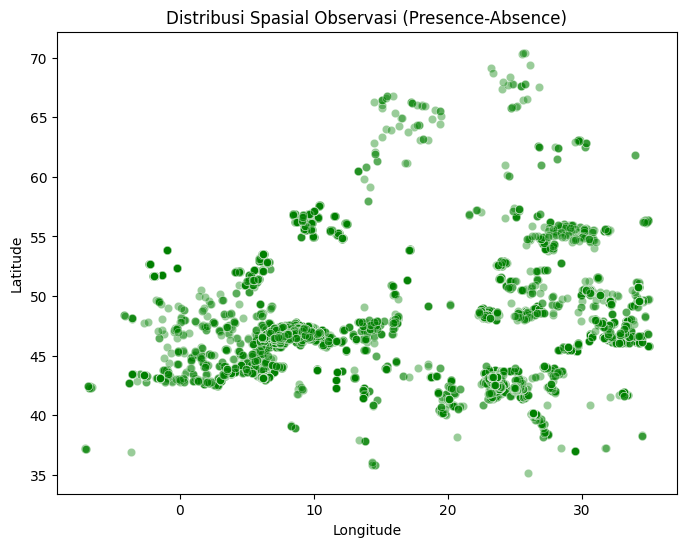

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='lon', y='lat', data=df_PA, alpha=0.4, color='green')
plt.title('Distribusi Spasial Observasi (Presence-Absence)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Penjelasan :** Plot ini menunjukkan sebaran lokasi pengamatan (presence atau absence) pada data `df_PA` di seluruh wilayah Eropa. Warna hijau dengan transparansi (alpha=0.4) digunakan untuk memvisualisasikan banyaknya observasi, sehingga area yang lebih padat akan tampak lebih gelap. Hal ini membantu mengidentifikasi area dengan konsentrasi pengamatan yang tinggi maupun rendah secara spasial.

##### Distribusi Tahun dan Bulan

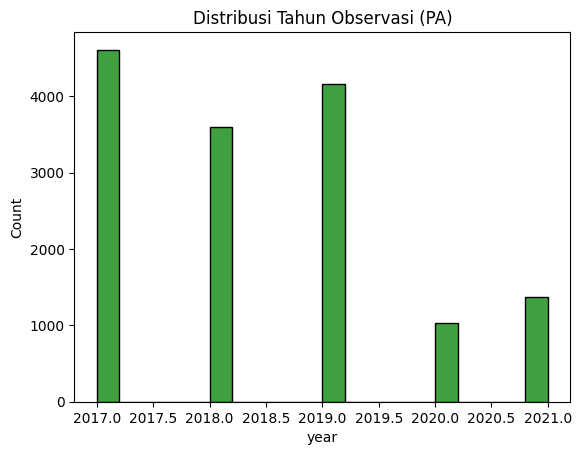

In [ ]:
sns.histplot(df_PA['year'].dropna(), bins=20, kde=False, color='green')
plt.title('Distribusi Tahun Observasi (PA)')
plt.show()

**Penjelasan :** Histogram ini menggambarkan tren peningkatan jumlah observasi dari tahun ke tahun, dimulai dari 2017 hingga 2021. Terlihat bahwa jumlah observasi meningkat secara signifikan, dengan puncaknya terjadi pada tahun 2021. Hal ini bisa menunjukkan adanya peningkatan aktivitas pengumpulan data atau kemajuan dalam sistem pencatatan dan pelaporan pada tahun-tahun terakhir.

##### Distribusi Kolom Numerik

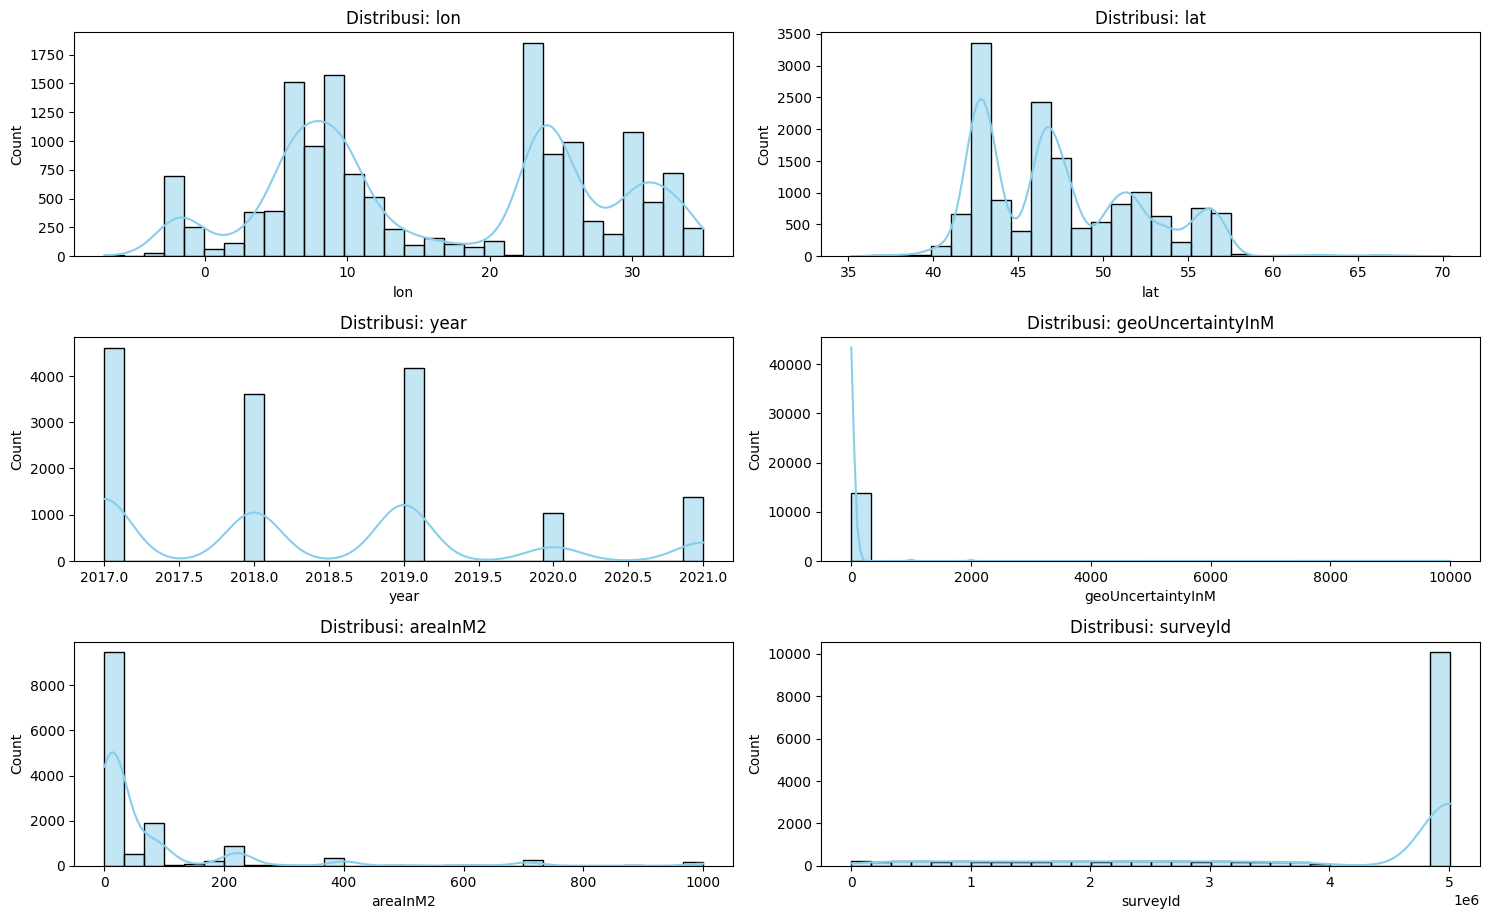

In [ ]:
numeric_cols_PA = df_PA.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, len(numeric_cols_PA)*3))
for i, col in enumerate(numeric_cols_PA, 1):
    plt.subplot(len(numeric_cols_PA), 2, i)
    sns.histplot(df_PA[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()

**Penjelasan :**

Beberapa pola penting yang bisa diamati: \

- **year, month, day**: Data observasi terkonsentrasi pada tahun-tahun dan bulan-bulan tertentu, menandakan tidak semua waktu memiliki jumlah observasi yang merata.

- **lat dan lon**: Menunjukkan distribusi spasial observasi di wilayah Eropa, dengan konsentrasi tinggi di lintang 45–60 dan bujur 0–20.

- **geoUncertaintyInM**: Mayoritas data memiliki ketidakpastian geografis yang rendah (<20 meter), menandakan akurasi lokasi cukup baik.

- **dayOfYear**: Memiliki distribusi mendekati normal, mencerminkan aktivitas pengamatan merata sepanjang tahun namun sedikit lebih aktif di musim semi-musim panas.

- **speciesId dan surveyId**: Terdistribusi cukup merata, mengindikasikan cakupan spesies dan survei yang luas.

Visualisasi ini berguna untuk memahami struktur dan pola umum dalam data, serta mendeteksi potensi bias temporal atau spasial.

#####  Boxplot untuk Presence-Absence (PA)

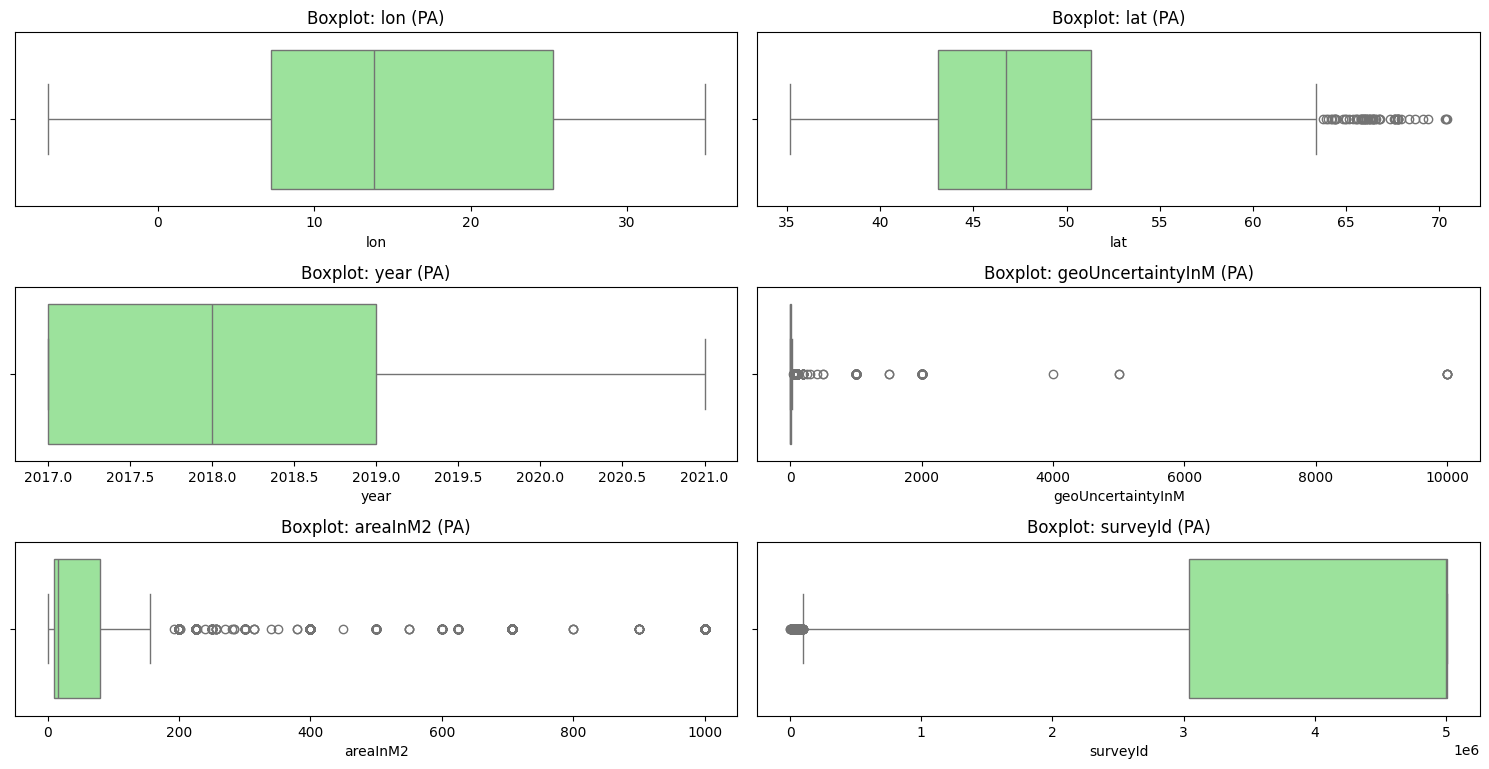

In [ ]:
numeric_cols_PA = df_PA.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, len(numeric_cols_PA)*2.5))
for i, col in enumerate(numeric_cols_PA, 1):
    plt.subplot(len(numeric_cols_PA), 2, i)
    sns.boxplot(data=df_PA, x=col, color='lightgreen')
    plt.title(f'Boxplot: {col} (PA)')
plt.tight_layout()
plt.show()

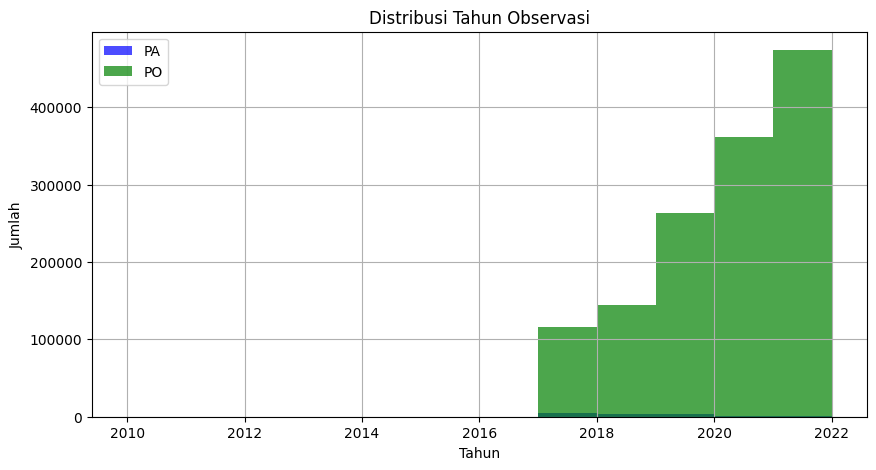

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df_PA['year'], bins=range(2010, 2023), alpha=0.7, label='PA', color='blue')
plt.hist(df_PO['year'], bins=range(2010, 2023), alpha=0.7, label='PO', color='green')
plt.title("Distribusi Tahun Observasi")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import folium
import pandas as pd

# Baca CSV
df = pd.read_csv(r"C:\Users\lenovo\DAMI\project\geolifeclef-2025\GLC25_PA_metadata_test.csv")

# Buat peta awal
m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=5)

# Tambahkan titik ke peta
for _, row in df.iterrows():
    popup_info = f"Country: {row['country']}<br>Year: {row['year']}<br>Area: {row['areaInM2']} m²"
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=popup_info
    ).add_to(m)

# Tampilkan peta
m


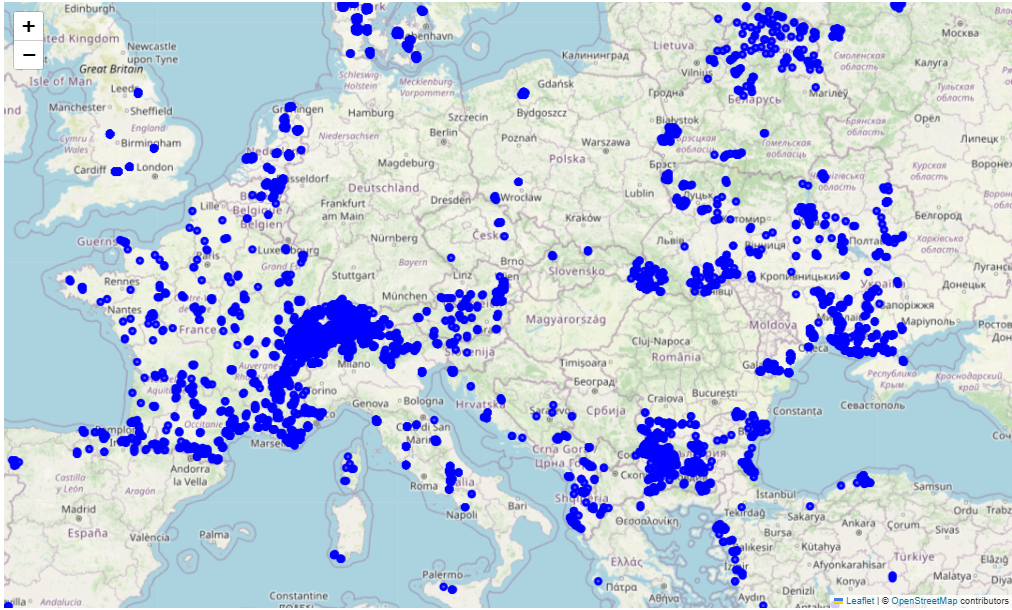

Peta itu adalah representasi spasial dari lokasi-lokasi observasi yang akan digunakan untuk melatih dan menguji model prediksi distribusi spesies tanaman.

##### Korelasi & Heatmap

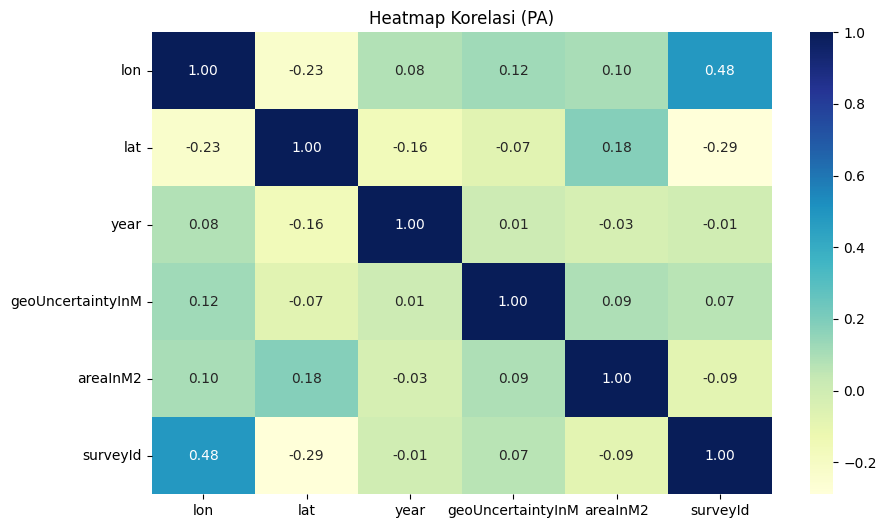

In [ ]:
corr_matrix_PA = df_PA[numeric_cols_PA].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_PA, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap Korelasi (PA)')
plt.show()

### Presence-Only (PO) occurrences

In [ ]:
# pada data P0
df_PO.head()

publisher    year  month   day       lat       lon  \
0         Pl@ntNet  2019.0    5.0   5.0  43.74605  1.573057   
1         Pl@ntNet  2021.0    3.0  17.0  42.12559  0.314948   
2         Pl@ntNet  2021.0    6.0   5.0  48.29520 -0.934518   
3  iNaturalist.org  2021.0    6.0   9.0  53.63367 -2.644535   
4  iNaturalist.org  2021.0    4.0   1.0  49.79471  7.925086   

   geoUncertaintyInM taxonRank        date  dayOfYear  speciesId  surveyId  
0                6.0   SPECIES  2019-05-05      125.0     3383.0       1.0  
1                5.0   SPECIES  2021-03-17       76.0     1152.0       2.0  
2               24.9   SPECIES  2021-06-05      156.0     6772.0       3.0  
3                8.0   SPECIES  2021-06-09      160.0     3318.0       4.0  
4               15.0   SPECIES  2021-04-01       91.0     3374.0       5.0

##### Statistik Deskriptif

In [ ]:
df_PO.describe()

year         month           day           lat           lon  \
count  1.358569e+06  1.358443e+06  1.358082e+06  1.358569e+06  1.358569e+06   
mean   2.019688e+03  6.668490e+00  1.586409e+01  5.093342e+01  7.201496e+00   
std    1.278617e+00  2.056205e+00  8.853297e+00  6.321779e+00  6.452641e+00   
min    2.017000e+03  1.000000e+00  1.000000e+00  3.456858e+01 -1.053904e+01   
25%    2.019000e+03  5.000000e+00  8.000000e+00  4.622220e+01  3.040347e+00   
50%    2.020000e+03  7.000000e+00  1.600000e+01  5.087187e+01  8.143021e+00   
75%    2.021000e+03  8.000000e+00  2.300000e+01  5.593230e+01  1.104249e+01   
max    2.021000e+03  1.200000e+01  3.100000e+01  7.117497e+01  3.455792e+01   

       geoUncertaintyInM     dayOfYear     speciesId      surveyId  
count       1.358569e+06  1.358569e+06  1.358569e+06  1.358569e+06  
mean        1.962389e+01  1.874055e+02  5.545563e+03  5.241500e+05  
std         2.064083e+01  6.251729e+01  3.264853e+03  3.023139e+05  
min         2.000000e-02  1.000000e+00  0.000000e+00  1.000000e+00  
25%         5.000000e+00  1.450000e+02  2.703000e+03  2.624740e+05  
50%         1.000000e+01  1.850000e+02  5.499000e+03  5.245780e+05  
75%         2.500000e+01  2.310000e+02  8.422000e+03  7.855070e+05  
max         9.800000e+01  3.660000e+02  1.125400e+04  1.048213e+06

In [ ]:
df_PO.shape

(1358570, 12)

In [ ]:
df_PO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358570 entries, 0 to 1358569
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   publisher          1358570 non-null  object 
 1   year               1358569 non-null  float64
 2   month              1358443 non-null  float64
 3   day                1358082 non-null  float64
 4   lat                1358569 non-null  float64
 5   lon                1358569 non-null  float64
 6   geoUncertaintyInM  1358569 non-null  float64
 7   taxonRank          1358569 non-null  object 
 8   date               1358569 non-null  object 
 9   dayOfYear          1358569 non-null  float64
 10  speciesId          1358569 non-null  float64
 11  surveyId           1358569 non-null  float64
dtypes: float64(9), object(3)
memory usage: 124.4+ MB


##### Missing Values

In [ ]:
print(df_PO.isnull().sum())

print(df_PO.duplicated().sum())

# Mengecek nilai unik di setiap kolom
for col in df_PO.columns:
    print(f"{col}: {df_PO[col].nunique()} nilai unik")


publisher              0
year                   1
month                127
day                  488
lat                    1
lon                    1
geoUncertaintyInM      1
taxonRank              1
date                   1
dayOfYear              1
speciesId              1
surveyId               1
dtype: int64
17982
publisher: 12 nilai unik
year: 5 nilai unik
month: 12 nilai unik
day: 31 nilai unik
lat: 762171 nilai unik
lon: 940485 nilai unik
geoUncertaintyInM: 9556 nilai unik
taxonRank: 2 nilai unik
date: 1826 nilai unik
dayOfYear: 366 nilai unik
speciesId: 7702 nilai unik
surveyId: 1028297 nilai unik


##### Distribusi Lokasi

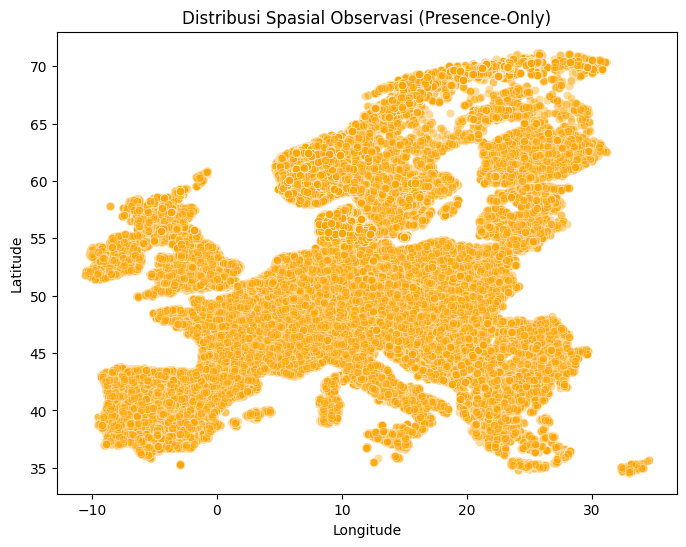

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='lon', y='lat', data=df_PO, alpha=0.4, color='orange')
plt.title('Distribusi Spasial Observasi (Presence-Only)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##### Distribusi Tahun

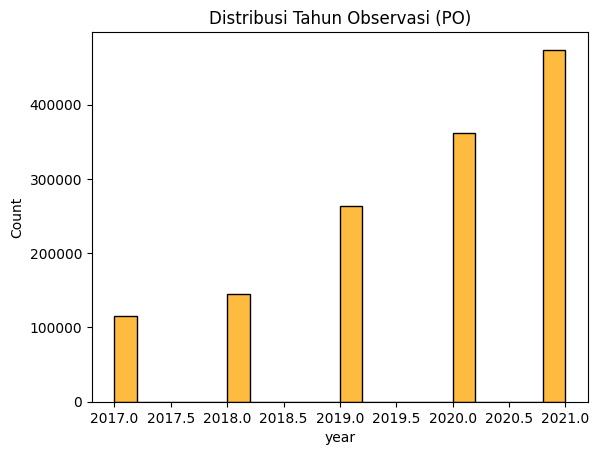

In [ ]:
sns.histplot(df_PO['year'].dropna(), bins=20, kde=False, color='orange')
plt.title('Distribusi Tahun Observasi (PO)')
plt.show()

##### Distribusi Kolom Numerik

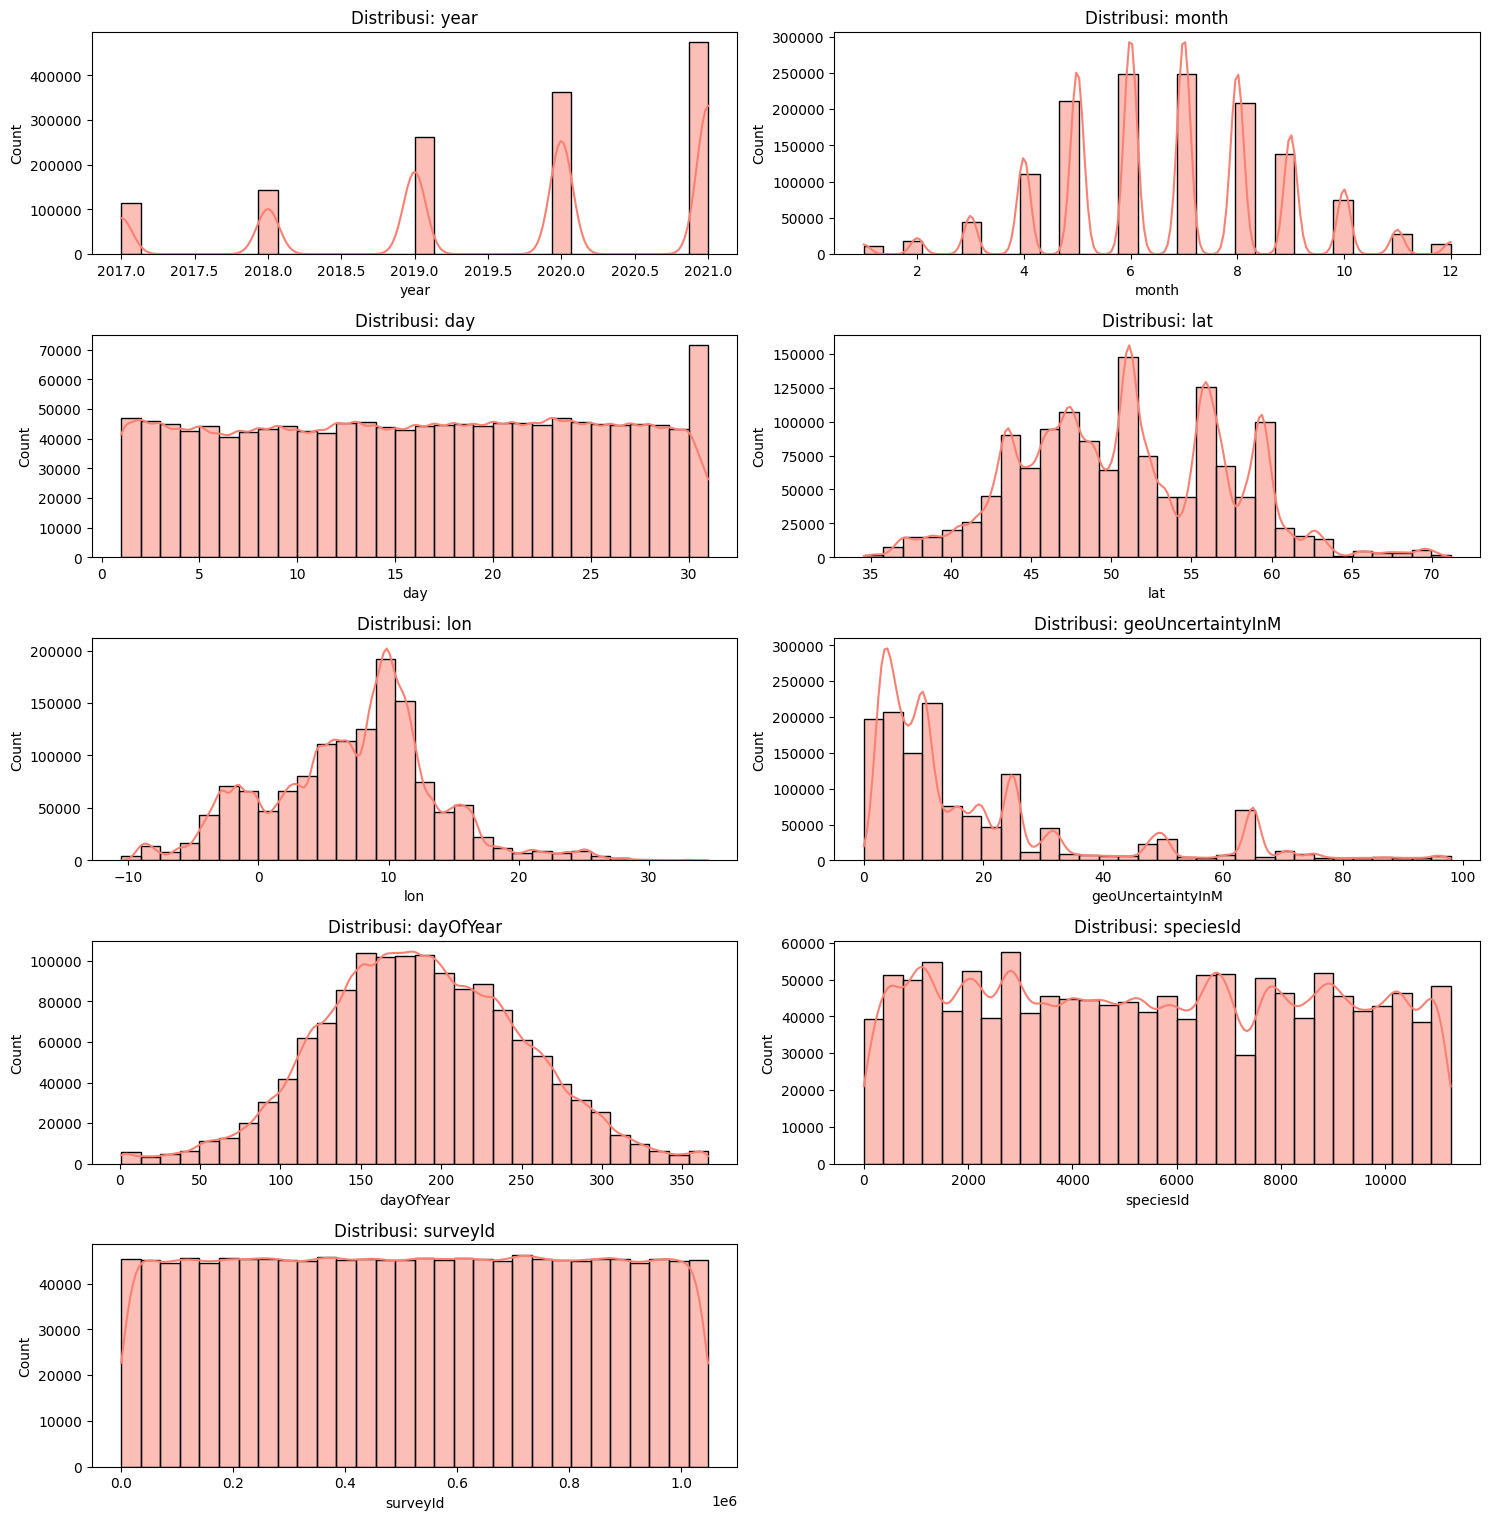

In [ ]:
numeric_cols_PO = df_PO.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, len(numeric_cols_PO)*3))
for i, col in enumerate(numeric_cols_PO, 1):
    plt.subplot(len(numeric_cols_PO), 2, i)
    sns.histplot(df_PO[col], kde=True, bins=30, color='salmon')
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()

##### Boxplot untuk Presence-Only (PO)

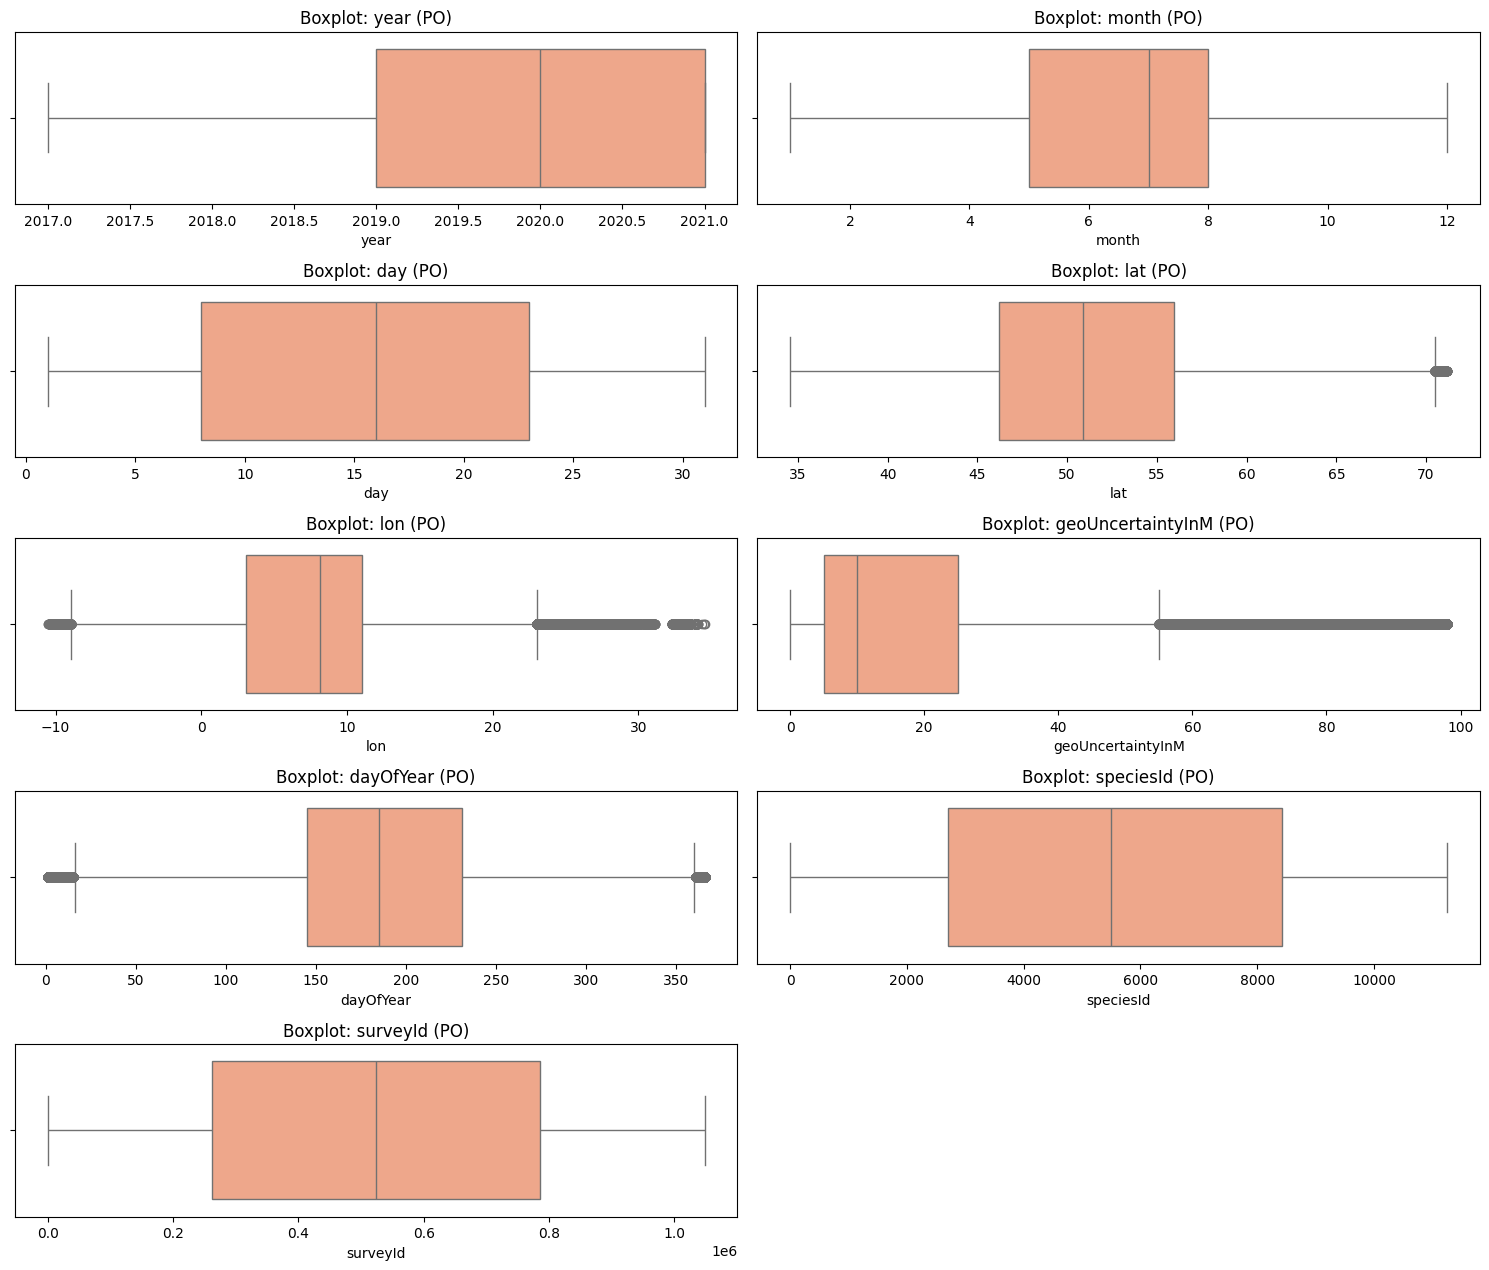

In [ ]:
numeric_cols_PO = df_PO.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, len(numeric_cols_PO)*2.5))
for i, col in enumerate(numeric_cols_PO, 1):
    plt.subplot(len(numeric_cols_PO), 2, i)
    sns.boxplot(data=df_PO, x=col, color='lightsalmon')
    plt.title(f'Boxplot: {col} (PO)')
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = df_PO.select_dtypes(include=np.number)

corr_matrix = numeric_cols.corr()

print("Matriks Korelasi:")
print(corr_matrix)


Matriks Korelasi:
                       year     month       day       lat       lon  \
year               1.000000 -0.072790 -0.008424 -0.260879 -0.073879   
month             -0.072790  1.000000 -0.102471  0.125040  0.057410   
day               -0.008424 -0.102471  1.000000 -0.004750 -0.006142   
lat               -0.260879  0.125040 -0.004750  1.000000  0.356256   
lon               -0.073879  0.057410 -0.006142  0.356256  1.000000   
geoUncertaintyInM  0.042086 -0.072659 -0.006436 -0.081618 -0.020084   
dayOfYear         -0.072657  0.990003  0.038485  0.124500  0.056442   
speciesId         -0.009503  0.003498  0.000434 -0.009945 -0.001934   
surveyId           0.001222  0.001340 -0.000246  0.002474  0.002702   

                   geoUncertaintyInM  dayOfYear  speciesId  surveyId  
year                        0.042086  -0.072657  -0.009503  0.001222  
month                      -0.072659   0.990003   0.003498  0.001340  
day                        -0.006436   0.038485   0.000434

In [23]:
# Install jika belum ada
!pip install folium matplotlib mapclassify geopandas shapely --quiet

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import tqdm

# Baca data Presence-Only
df_PO = pd.read_csv(r"C:\Users\lenovo\DAMI\project\geolifeclef-2025\GLC25_P0_metadata_train.csv")

# Ambil subset (2000 titik acak berdasarkan surveyId unik)
po_geo_df = df_PO.drop_duplicates('surveyId').sample(n=2000, random_state=42)
po_geo_df.index = range(len(po_geo_df))  # Reset index

# Buat kolom geometry: Point(lon, lat)
point_list = []
for i in tqdm.tqdm(range(len(po_geo_df))):
    x, y = po_geo_df.loc[i, ['lon', 'lat']]
    point_list.append(Point(x, y))

po_geo_df['geometry'] = point_list

# Buat GeoDataFrame
vis_geo_po = gpd.GeoDataFrame(po_geo_df, geometry='geometry')
vis_geo_po.crs = 'EPSG:4326'

# Tampilkan peta interaktif (gunakan .explore untuk geopandas >= 0.10)
vis_geo_po.drop_duplicates(['lon', 'lat']).explore(color='green')


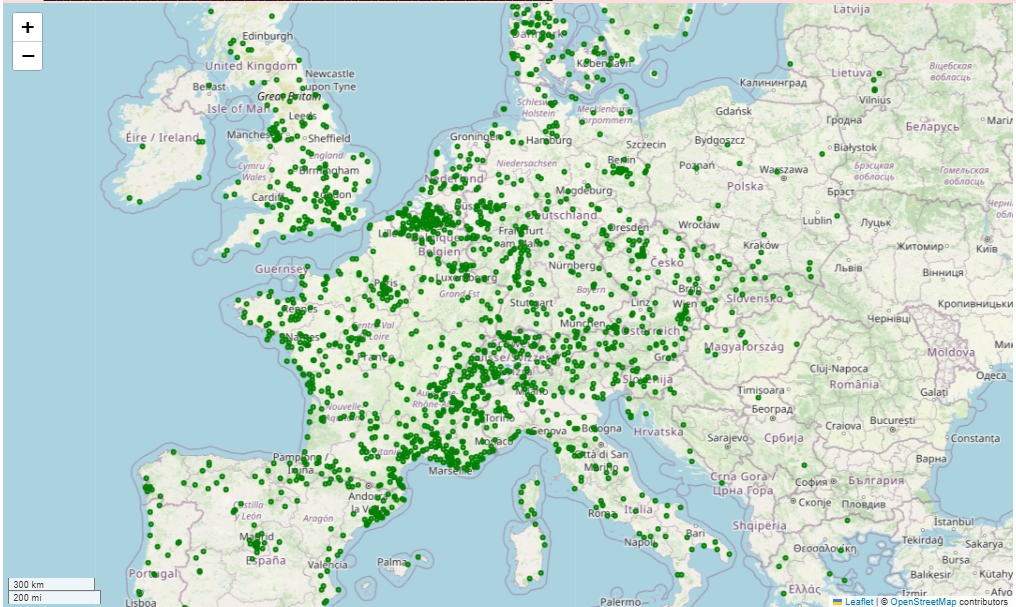

##### Korelasi & Heatmap

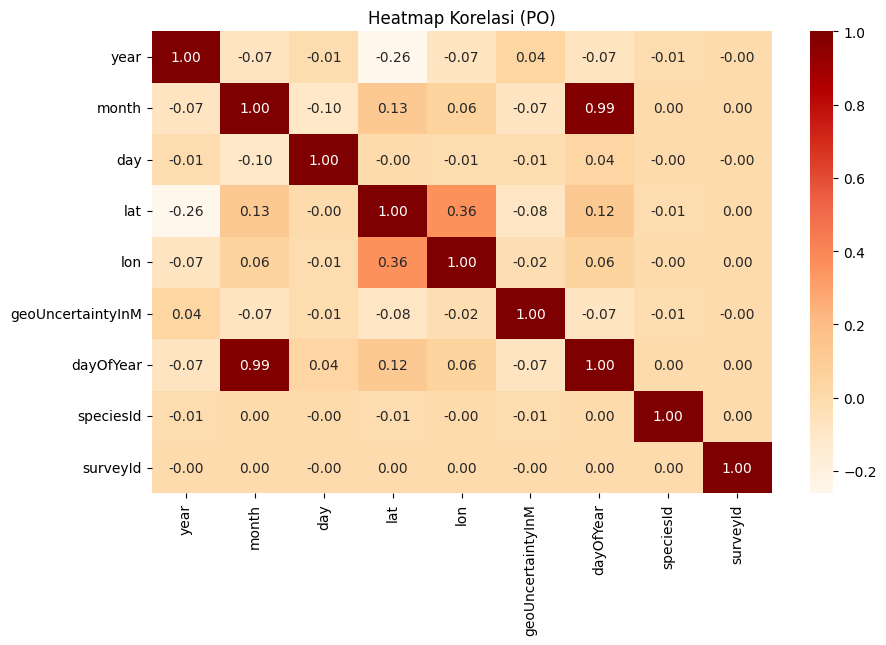

In [ ]:
corr_matrix_PO = df_PO[numeric_cols_PO].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_PO, annot=True, cmap='OrRd', fmt='.2f')
plt.title('Heatmap Korelasi (PO)')
plt.show()

# Data Preparation

#### Memilah Data (Data Selection)

In [7]:
print("Kolom pada df_PA:")
print(df_PA.columns.tolist())

print("Kolom pada df_PO:")
print(df_PO.columns.tolist())

Kolom pada df_PA:
['lon', 'lat', 'year', 'geoUncertaintyInM', 'areaInM2', 'region', 'country', 'surveyId']
Kolom pada df_PO:
['publisher', 'year', 'month', 'day', 'lat', 'lon', 'geoUncertaintyInM', 'taxonRank', 'date', 'dayOfYear', 'speciesId', 'surveyId']


In [8]:
selected_cols_PA = ['lon', 'lat', 'year', 'geoUncertaintyInM', 'areaInM2', 'region', 'country', 'surveyId']
selected_cols_PO = ['publisher', 'year', 'month', 'day', 'lat', 'lon', 'geoUncertaintyInM', 'taxonRank', 'date', 'dayOfYear', 'speciesId', 'surveyId']

df_PA = df_PA[selected_cols_PA].copy()
df_PO = df_PO[selected_cols_PO].copy()

In [9]:
print(df_PA.columns.tolist())
print(df_PO.columns.tolist())

['lon', 'lat', 'year', 'geoUncertaintyInM', 'areaInM2', 'region', 'country', 'surveyId']
['publisher', 'year', 'month', 'day', 'lat', 'lon', 'geoUncertaintyInM', 'taxonRank', 'date', 'dayOfYear', 'speciesId', 'surveyId']


#### Membersihkan Data (Data Cleaning)

In [10]:
print("Nilai kosong (PA):\n", df_PA.isnull().sum())
print("Nilai kosong (PO):\n", df_PO.isnull().sum())

print("Jumlah baris duplikat (PA):", df_PA.duplicated().sum())
print("Jumlah baris duplikat (PO):", df_PO.duplicated().sum())

Nilai kosong (PA):
 lon                    0
lat                    0
year                   0
geoUncertaintyInM    840
areaInM2             644
region                 0
country                0
surveyId               0
dtype: int64
Nilai kosong (PO):
 publisher               0
year                    0
month                 484
day                  1819
lat                     0
lon                     0
geoUncertaintyInM       0
taxonRank               0
date                    0
dayOfYear               0
speciesId               0
surveyId                0
dtype: int64
Jumlah baris duplikat (PA): 0
Jumlah baris duplikat (PO): 67685


In [11]:
df_PA_clean = df_PA.dropna().drop_duplicates()
df_PO_clean = df_PO.dropna().drop_duplicates()

In [12]:
print(df_PA_clean.shape)
print(df_PO_clean.shape)

(13331, 8)
(5010338, 12)


#### Mengontruksi Label Data (Label Construction)

In [13]:
df_PA_clean['label'] = 0  # titik-titik PA dianggap sebagai ketidakhadiran
df_PO_clean['label'] = 1  # PO artinya pasti ditemukan (presence)

In [14]:
print("Distribusi label PA:", df_PA_clean['label'].value_counts().to_dict())
print("Distribusi label PO:", df_PO_clean['label'].value_counts().to_dict())

Distribusi label PA: {0: 13331}
Distribusi label PO: {1: 5010338}


#### Menentukan Label Data (Label Definition)

Hasil distribusi label :

`Distribusi label PA: {0: 13331}` \
`Distribusi label PO: {1: 5010338}`

Dalam konteks ini, semua data PO diberi label 1 karena secara definisi data Presence-Only hanya mencatat keberadaan spesies, tanpa informasi tentang ketidakhadiran. Oleh karena itu, label 1 menunjukkan kehadiran spesies.

Sementara itu, data PA mencakup baik kehadiran maupun ketidakhadiran spesies. Namun, berdasarkan distribusi label yang ditampilkan ({0: 13,331}), seluruh entri dalam data PA saat ini berlabel 0, yang berarti tidak ada spesies yang tercatat hadir dalam subset tersebut.

Dengan demikian:

Label 1 menandakan kehadiran spesies (presence).

Label 0 menandakan ketidakhadiran spesies (absence), yang hanya terdapat dalam data PA.

#### Mengintegrasikan Data (Data Integration)

In [15]:
print("Kolom df_PA_clean:", df_PA_clean.columns.tolist())
print("Kolom df_PO_clean:", df_PO_clean.columns.tolist())


Kolom df_PA_clean: ['lon', 'lat', 'year', 'geoUncertaintyInM', 'areaInM2', 'region', 'country', 'surveyId', 'label']
Kolom df_PO_clean: ['publisher', 'year', 'month', 'day', 'lat', 'lon', 'geoUncertaintyInM', 'taxonRank', 'date', 'dayOfYear', 'speciesId', 'surveyId', 'label']


In [16]:
df_PA_clean['source'] = 'PA'
df_PO_clean['source'] = 'PO'

In [17]:
df_PA_selected = df_PA_clean[['lat', 'lon', 'year', 'source']].copy()
df_PO_selected = df_PO_clean[['lat', 'lon', 'year', 'source']].copy()

# Pastikan kolom 'year' bertipe int
df_PA_selected['year'] = df_PA_selected['year'].astype(int)
df_PO_selected['year'] = df_PO_selected['year'].astype(int)

In [18]:
df_PA_selected.loc[:, 'year'] = df_PA_selected['year'].astype(int)
df_PO_selected.loc[:, 'year'] = df_PO_selected['year'].astype(int)


Data PO & PA digabung menjadi satu df_combined

In [19]:
df_combined = pd.concat([df_PA_selected, df_PO_selected], ignore_index=True)
print(df_combined.head())

        lat        lon  year source
0  57.12081  10.033550  2019     PA
1  42.58006   1.843658  2018     PA
2  46.26149  11.720090  2021     PA
3  55.90245   9.361870  2017     PA
4  57.12295  10.010010  2019     PA


In [26]:
import folium

# Ambil hanya 1000 titik secara acak
df_sample = df_combined.sample(n=1000, random_state=42)

# Bersihkan NaN dan konversi tipe
df_sample = df_sample.dropna(subset=['lat', 'lon', 'year'])
df_sample['year'] = df_sample['year'].astype(int)

# Buat peta
m = folium.Map(location=[df_sample['lat'].mean(), df_sample['lon'].mean()], zoom_start=5)

# Tambahkan marker
for _, row in df_sample.iterrows():
    color = 'blue' if row['source'] == 'PA' else 'green'
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=3,
        color=color,
        fill=True,
        fill_opacity=0.5,
        popup=f"{row['source']} - {row['year']}"
    ).add_to(m)

m


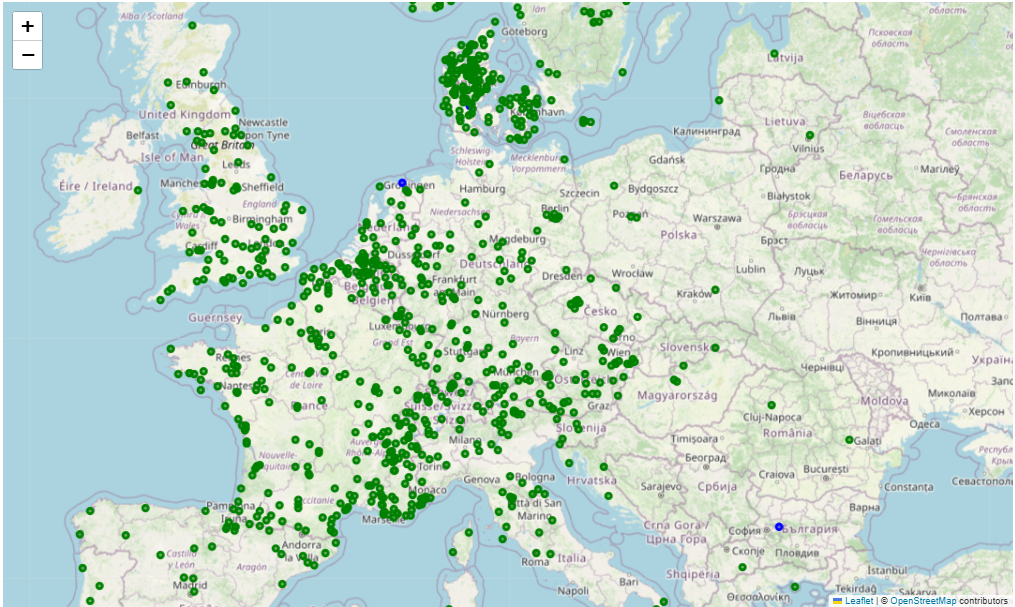

# Modeling

## Membangun Skenario Pengujian

🎯 Tujuan:
Tujuan dari pengujian ini adalah untuk memprediksi keberadaan spesies tanaman (label = 1) di suatu lokasi berdasarkan input citra satelit dalam bentuk patch berukuran 64x64 piksel yang mencakup spektrum RGB + NIR. Model CNN akan dilatih untuk mengenali pola-pola visual yang berkaitan dengan keberadaan spesies berdasarkan data geografis dan pengamatan lapangan.

#### **A. Persiapan Data**

Langkah pertama yang kami lakukan adalah **menggabungkan data Presence-Absence (PA)** dan **Presence-Only (PO)**. Kedua jenis data ini memiliki struktur kolom yang berbeda, sehingga perlu disesuaikan terlebih dahulu sebelum penggabungan.

* **Labeling**: Data dari PA dan PO sama-sama dianggap merepresentasikan kehadiran spesies, sehingga keduanya kami beri label `1` untuk klasifikasi biner (ada/tidak ada).
* **Fitur yang digunakan**: Kami mempertahankan fitur penting seperti koordinat GPS (`lat`, `lon`), `year`, `geoUncertaintyInM`, dan `speciesId` sebagai representasi dasar sebelum menggabungkannya dengan data eksternal.
* **Ekspansi Data (Feature Engineering)**: Ke depan, kami juga mempertimbangkan integrasi data citra satelit, data iklim, tutupan lahan, dan tekanan manusia (human footprint) untuk memperkuat fitur yang tersedia.

#### **B. Skenario Pengujian**

Setelah data siap, kami menyusun skenario pengujian sebagai berikut:

1. **Pembagian Dataset**
   Dataset hasil penggabungan akan dibagi menjadi tiga bagian:

   * **Training set**: Untuk melatih model CNN.
   * **Validation set**: Untuk memantau performa model selama proses pelatihan dan mencegah overfitting.
   * **Testing set**: Untuk mengevaluasi performa akhir model terhadap data yang belum pernah dilihat sebelumnya.

2. **Arsitektur Model CNN**
   Model CNN dibangun dengan beberapa lapisan konvolusi dan max-pooling, diikuti dengan flattening dan dense layer. Input model berupa citra satelit berukuran 64x64 piksel dengan 4 channel (RGB + NIR). Model dilatih untuk melakukan klasifikasi biner: apakah di suatu lokasi terdapat spesies atau tidak.

3. **Evaluasi Model**
   Model yang telah dilatih akan dievaluasi menggunakan metrik:

   * **Akurasi**: Persentase prediksi yang benar.
   * **AUC (Area Under Curve)**: Mengukur kemampuan model membedakan antara kelas.
   * **Confusion Matrix**: Untuk melihat distribusi hasil prediksi model terhadap label sebenarnya (True Positive, False Positive, dll).

4. **Reproduksibilitas dan Validasi Eksternal**
   Untuk memastikan model dapat digunakan dalam skenario nyata, kami merancang sistem agar dapat menerima input lokasi GPS dan menghasilkan prediksi keberadaan spesies. Pengujian lebih lanjut akan dilakukan menggunakan patch citra dari lokasi baru.


### Model CNN

#### Kode untuk Membangun Model CNN

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Input

# Bangun Model Sequential
model = Sequential([
    Input(shape=(5,)),  # Input dengan 5 fitur (lon, lat, year, geoUncertaintyInM, speciesId)
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Menyusun model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ringkasan model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import pickle

# ========================
# 1. Load Dataset
# ========================
df_PA = pd.read_csv("/content/sample_data/GLC25_PA_metadata_test.csv")
df_PO = pd.read_csv("/content/sample_data/GLC25_P0_metadata_train.csv")

# ========================
# 2. Perbaiki Label
# ========================
df_PA['speciesId'] = -1
df_PA['label'] = 0  # <== sekarang PA dianggap "absence"
df_PO['label'] = 1  # PO tetap "presence"

# Ambil kolom yang sama
cols = ['lon', 'lat', 'year', 'geoUncertaintyInM', 'speciesId', 'label']
data_PA = df_PA[cols].copy()
data_PO = df_PO[cols].copy()

# Gabungkan
df_all = pd.concat([data_PA, data_PO], ignore_index=True)

# ========================
# 3. Preprocessing
# ========================
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.dropna()

X = df_all[['lon', 'lat', 'year', 'geoUncertaintyInM', 'speciesId']].values
y = df_all['label'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.nan_to_num(X_train, nan=0.0, posinf=1e6, neginf=-1e6)
X_val = np.nan_to_num(X_val, nan=0.0, posinf=1e6, neginf=-1e6)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# ========================
# 4. Bangun & Latih Model
# ========================
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# ========================
# 5. Simpan Model & Scaler ke .pkl
# ========================
model.save("species_prediction_mlp.keras")

with open("species_prediction_model.pkl", "wb") as f:
    pickle.dump({
        "scaler": scaler,
        "model_architecture": model.to_json(),
        "model_weights": model.get_weights(),
        "features": ['lon', 'lat', 'year', 'geoUncertaintyInM', 'speciesId']
    }, f)

print("✅ Model dan scaler berhasil disimpan ke species_prediction_model.pkl")

Epoch 1/10
31836/31836 ━━━━━━━━━━━━━━━━━━━━ 101s 3ms/step - accuracy: 0.9927 - loss: 0.0308 - val_accuracy: 0.9993 - val_loss: 0.0023
Epoch 2/10
31836/31836 ━━━━━━━━━━━━━━━━━━━━ 144s 3ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9997 - val_loss: 0.0012
Epoch 3/10
31836/31836 ━━━━━━━━━━━━━━━━━━━━ 132s 3ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9996 - val_loss: 0.0012
Epoch 4/10
31836/31836 ━━━━━━━━━━━━━━━━━━━━ 153s 3ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9998 - val_loss: 8.1590e-04
Epoch 5/10
31836/31836 ━━━━━━━━━━━━━━━━━━━━ 141s 3ms/step - accuracy: 0.9996 - loss: 0.0010 - val_accuracy: 0.9998 - val_loss: 7.1478e-04
Epoch 6/10
31836/31836 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - accuracy: 0.9997 - loss: 9.1513e-04 - val_accuracy: 0.9995 - val_loss: 0.0011
Epoch 7/10
31836/31836 ━━━━━━━━━━━━━━━━━━━━ 145s 3ms/step - accuracy: 0.9997 - loss: 8.9306e-04 - val_accuracy: 0.9998 - val_loss: 6.2431e-04
Epoch 8/10
31836/31836 ━━━━━━━━━━━━━━━━━━━━

### 2. Plot learning curve dari history 

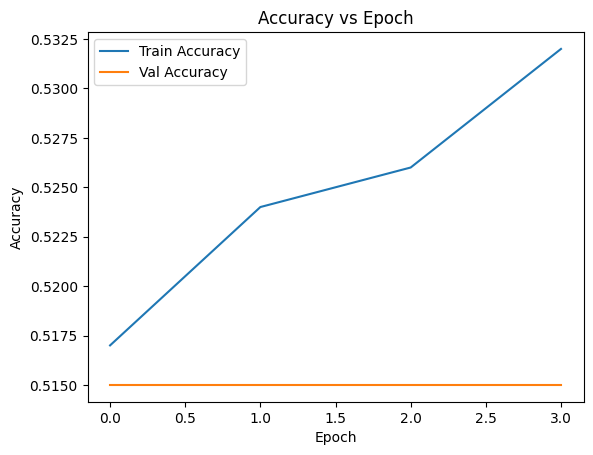

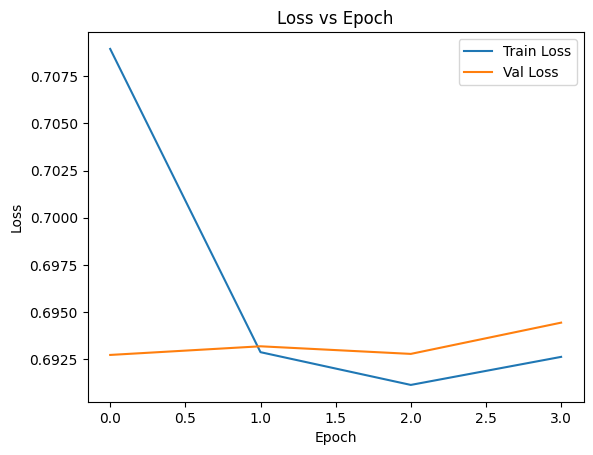

In [113]:
# Plot learning curve dari history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epoch')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epoch')
plt.show()


### 3. Confusion Matrix & Classification Report

31836/31836 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step


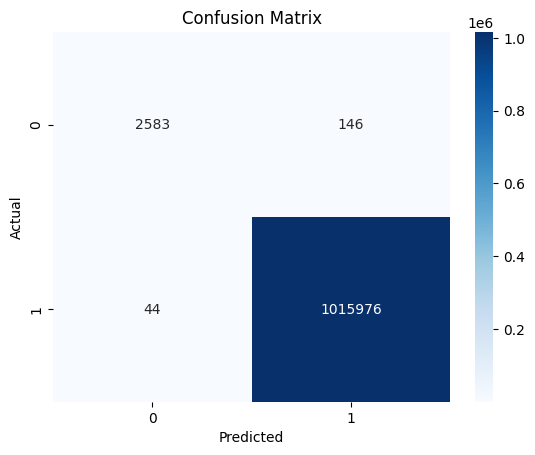

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2729
           1       1.00      1.00      1.00   1016020

    accuracy                           1.00   1018749
   macro avg       0.99      0.97      0.98   1018749
weighted avg       1.00      1.00      1.00   1018749

✅ Akurasi Model: 0.9998


In [114]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi (misalnya gunakan data validasi)
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_binary)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_val, y_pred_binary))

# Akurasi
accuracy = accuracy_score(y_val, y_pred_binary)
print(f"✅ Akurasi Model: {accuracy:.4f}")


---